In [4]:
import pandas as pd
import numpy as np
from numpy import pi
from astropy import units as u
from astropy import constants as c
from astropy.constants import m_e
from scipy.special import zeta
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.special import jv

plt.rcParams["axes.linewidth"] = 1
plt.rcParams["xtick.major.width"] = 2.5
plt.rcParams["xtick.major.size"] = 8
plt.rcParams["xtick.minor.size"] = 5
plt.rcParams["ytick.major.width"] = 2.5
plt.rcParams["ytick.major.size"] = 8
plt.rcParams["ytick.minor.size"] = 4
plt.rcParams["ytick.labelsize"] = 18
plt.rcParams["xtick.labelsize"] = 18
plt.rcParams["axes.titlesize"] = 22
plt.rcParams["figure.titlesize"] = 28
plt.rcParams["legend.fontsize"] = 16
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['text.usetex'] = False

# IV: A Study in Simulations
## Orienting Yourself : The Linear Power Spectrum

In [6]:
h = 0.6711
Omega_M = 0.3175
Omega_b = 0.049

linear_pk = np.loadtxt('data/linear_pk.txt')
k, Pk = linear_pk[:,0], linear_pk[:,1]

from scipy.optimize import curve_fit

def powlaw(x, a, b) :
    return a * np.power(x, b)

pars, cov = curve_fit(f=powlaw, xdata=k[:100], ydata=Pk[:100], p0=[0, 0], bounds=(-np.inf, np.inf))
a, b = pars
print(pars)

[3.03838368e+06 9.62309716e-01]


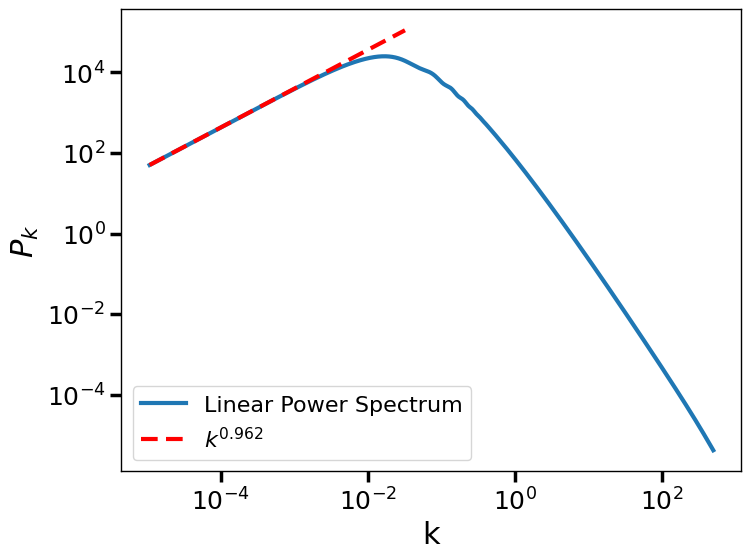

In [8]:
fig, ax = plt.subplots(1,1, figsize=(8,6))   
ax.plot(k, Pk, label="Linear Power Spectrum")

x = np.linspace(k[0], k[400], 1000)
ax.plot(x, powlaw(x, a, b), color='red', linestyle='--', dashes=(4, 2), label=r"$k^{0.962}$")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("k")
ax.set_ylabel(r"$P_k$")
plt.legend()
plt.savefig("linear_ps.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

In [9]:
# Calculate sigma8
R = 8 # Mpc/h
z = 0

DeltaSquared = k**3*Pk/(2*np.pi**2)
int = (DeltaSquared * (3*jv(1,k*R)/(k*R))**2)
np.sum(int[:-1] * (k[1:]-k[:-1]) * 1/k[:-1])


#sigma8Squared = integrate.quad(lambda x: DeltaSquaredjv(1,x), 0, 4.5)

1.3597143148610429

In [10]:
# BBKS transfer function (Bardeen et al., 1986)

Gamma = Omega_M*np.exp(-Omega_b-1.3*Omega_b/Omega_M)
q = 1/Gamma * k
T = np.log(1+2.34*q)/(2.34*q) * np.power(1 + 3.89*q + (16.1*q)**2 + (5.46*q)**3 + (6.71*q)**4, -1/4)
# Normalize to T = 1 at large scales
T = T/T[0]

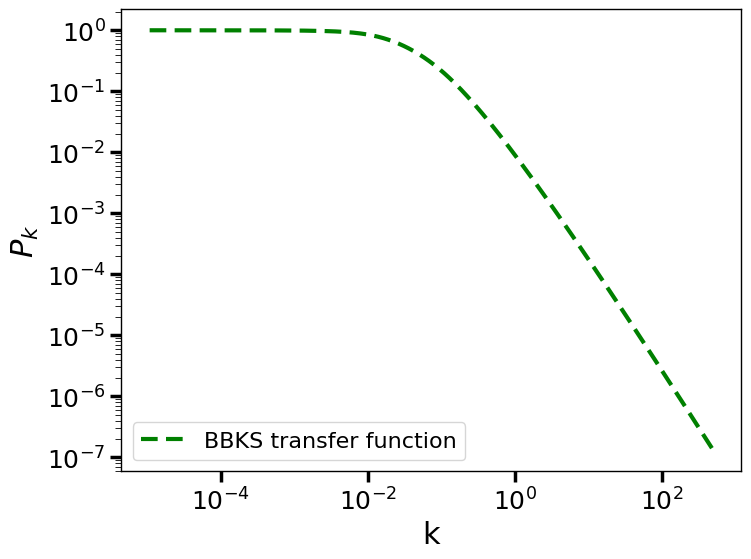

In [11]:
fig, ax = plt.subplots(1,1, figsize=(8,6))   
#ax.plot(k, Pk, label="Linear Power Spectrum")

x = np.linspace(k[0], k[400], 1000)
#ax.plot(x, powlaw(x, a, b), color='red', linestyle='--', dashes=(4, 2), label=r"$k^{0.962}$")
ax.plot(k, T, color='green', linestyle='--', dashes=(4, 2), label=r"BBKS transfer function")

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("k")
ax.set_ylabel(r"$P_k$")
plt.legend()
plt.savefig("linear_ps_transfer.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

In [104]:
# finding k_eq, roughly where Pk reaches its max
k[np.argmax(Pk)]

0.016875